In [20]:
import pandas as pd 
import numpy as np
import json

In [21]:
path='example.txt'

In [35]:
with open(path) as f:
    records=[json.loads(line) for line in f]
    time_zones=[rec['tz'] for rec in records if 'tz' in rec]

In [39]:
time_zones_S=pd.Series(time_zones)

In [42]:
a=time_zones_S.value_counts()

In [104]:
df.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN


In [51]:
a[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

In [52]:
from collections import Counter
c=Counter(time_zones)

In [54]:
df=pd.DataFrame(records)

In [74]:
time_zone_counts=df['tz'].value_counts()

In [78]:
clean_tz=df['tz'].fillna('Missing')

In [81]:
clean_tz[clean_tz=='']='Unknown'

In [87]:
tz_counts=clean_tz.value_counts()

In [84]:
import seaborn as sns

In [88]:
subset=tz_counts[:10]

Text(0, 0.5, 'frequency of timezones')

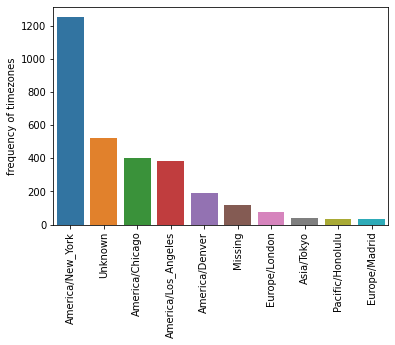

In [101]:
bp=sns.barplot(x=subset.index,y=subset.values)
bp.set_xticklabels(bp.get_xticklabels(),rotation = 90)
bp.set_ylabel("Frequency of timezones")

In [133]:
alist=pd.Series([x.split()[0] for x in df.a.dropna()])

[Text(0, 0, 'Mozilla/5.0'),
 Text(1, 0, 'Mozilla/4.0'),
 Text(2, 0, 'GoogleMaps/RochesterNY'),
 Text(3, 0, 'Opera/9.80'),
 Text(4, 0, 'TEST_INTERNET_AGENT')]

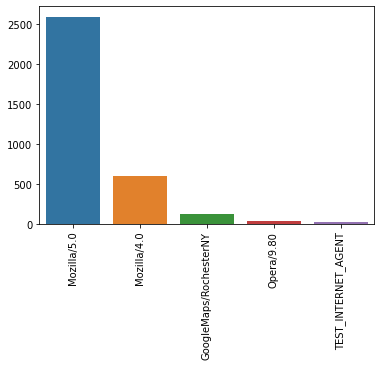

In [138]:
vc=alist.value_counts()[:5]
pl=sns.barplot(x=vc.index,y=vc.values)
pl.set_xticklabels(pl.get_xticklabels(),rotation=90)

In [145]:
cframe=df[df.a.notnull()]

In [146]:
cframe['os']=np.where(cframe['a'].str.contains('Windows'),'Windows','not windows')

C:\Users\WIN10~1\AppData\Local\Temp/ipykernel_2380/1005885141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cframe['os']=np.where(cframe['a'].str.contains('Windows'),'Windows','not windows')


In [147]:
cframe.os

0           Windows
1       not windows
2           Windows
3       not windows
4           Windows
           ...     
3555        Windows
3556        Windows
3557    not windows
3558    not windows
3559        Windows
Name: os, Length: 3440, dtype: object

In [153]:

by_tz_os=cframe.groupby(['tz','os'])

In [154]:
by_tz_os

In [161]:
agg_counts=by_tz_os.size().unstack().fillna(0)

In [162]:
agg_counts

os,Windows,not windows
tz,,
,276.0,245.0
Africa/Cairo,3.0,0.0
Africa/Casablanca,1.0,0.0
Africa/Ceuta,2.0,0.0
Africa/Johannesburg,1.0,0.0
...,...,...
Europe/Volgograd,1.0,0.0
Europe/Warsaw,15.0,1.0
Europe/Zurich,0.0,4.0


In [163]:
indexer=agg_counts.sum(1).argsort()

In [165]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [166]:
count_subset=agg_counts.take(indexer[-10:])

In [167]:
count_subset

os,Windows,not windows
tz,,
America/Sao_Paulo,20.0,13.0
Europe/Madrid,19.0,16.0
Pacific/Honolulu,36.0,0.0
Asia/Tokyo,35.0,2.0
Europe/London,31.0,43.0
America/Denver,59.0,132.0
America/Los_Angeles,252.0,130.0
America/Chicago,285.0,115.0
,276.0,245.0


In [168]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [169]:
count_subset=count_subset.stack()
count_subset.name='total'
count_subset=count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Windows,20.0
1,America/Sao_Paulo,not windows,13.0
2,Europe/Madrid,Windows,19.0
3,Europe/Madrid,not windows,16.0
4,Pacific/Honolulu,Windows,36.0
5,Pacific/Honolulu,not windows,0.0
6,Asia/Tokyo,Windows,35.0
7,Asia/Tokyo,not windows,2.0
8,Europe/London,Windows,31.0
9,Europe/London,not windows,43.0


<AxesSubplot:xlabel='total', ylabel='tz'>

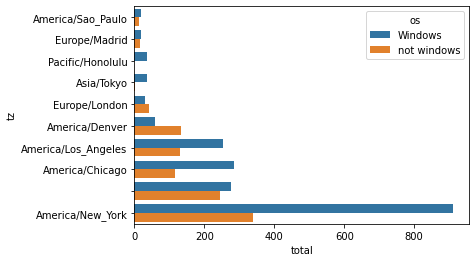

In [170]:
sns.barplot(x='total',y='tz',hue='os',data=count_subset)

In [171]:
def norm_total(group):
    group['normed_total']=group.total/group.total.sum()
    return group
results=count_subset.groupby('tz').apply(norm_total)

<AxesSubplot:xlabel='normed_total', ylabel='tz'>

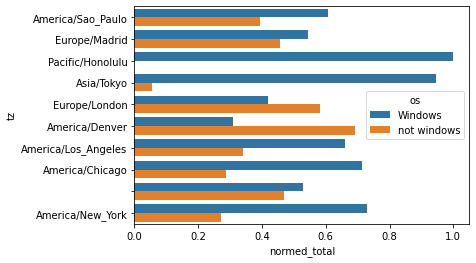

In [172]:
sns.barplot(x='normed_total',y='tz',hue='os',data=results)

In [173]:
g=count_subset.groupby('tz')

In [174]:
results2=count_subset.total/g.total.transform('sum')


[Text(0, 0, '0.0'),
 Text(1, 0, '0.05405405405405406'),
 Text(2, 0, '0.2709832134292566'),
 Text(3, 0, '0.2875'),
 Text(4, 0, '0.3089005235602094'),
 Text(5, 0, '0.3403141361256545'),
 Text(6, 0, '0.3939393939393939'),
 Text(7, 0, '0.4189189189189189'),
 Text(8, 0, '0.45714285714285713'),
 Text(9, 0, '0.47024952015355087'),
 Text(10, 0, '0.5297504798464492'),
 Text(11, 0, '0.5428571428571428'),
 Text(12, 0, '0.581081081081081'),
 Text(13, 0, '0.6060606060606061'),
 Text(14, 0, '0.6596858638743456'),
 Text(15, 0, '0.6910994764397905'),
 Text(16, 0, '0.7125'),
 Text(17, 0, '0.7290167865707434'),
 Text(18, 0, '0.9459459459459459'),
 Text(19, 0, '1.0')]

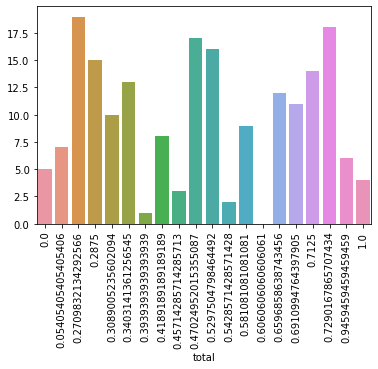

In [183]:
a=sns.barplot(x=results2,y=results2.index)
a.set_xticklabels(a.get_xticklabels(),rotation=90)